## TP4  Segmentation d'images

# Noms et prénoms des membres du groupe:

<h5> BENZAIED Saifeddine
<h5> BOUNEB Rayen
<h5> CHAOUANI Nesrine
    
    
<h6> RT4 -groupe 1

#### Importer les librairies et bibliothéques nécessaires

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu,threshold_multiotsu
from skimage.transform import resize
import cv2
import pandas as pd
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw

I.1 **Segmentation par seuillage**

###Question:
1. Lire l’image de test 06.png,  puis afficher-là.
2. Afficher son histogramme. Distinguer les zones séparables sur histogramme.
3. Calculer manuellement un seuil de segmentation et segmenter l'image. Afficher le résultat de segmentation.
4. Calculer le seuil avec la méthode d’Otsu et affichez le résultat de la segmentation. Comparer avec le seuillage manuel.

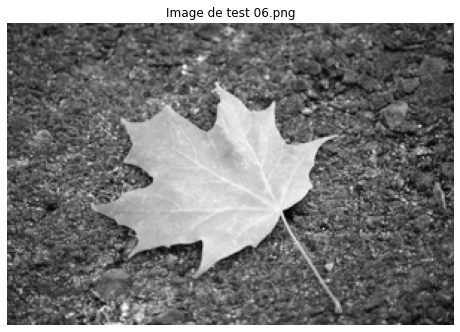

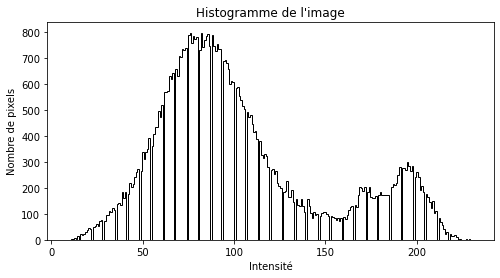

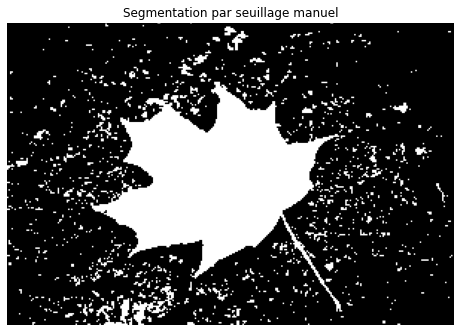

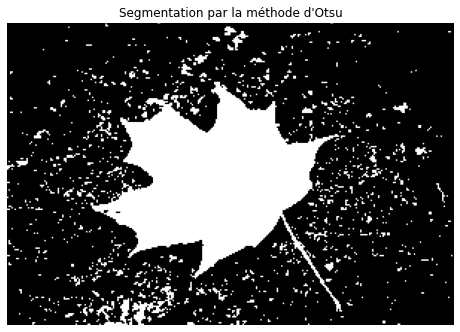

*************************************************

Seuil manuel: 128, Seuil d'Otsu: 129

*************************************************


In [2]:
# Lire et afficher l'image de test
image_path = "06.png"
image = imread(image_path, as_gray=True)
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title("Image de test 06.png")
plt.axis('off')
plt.show()

# Afficher l'histogramme
plt.figure(figsize=(8, 4))
plt.hist(image.ravel(), bins=256, histtype='step', color='black')
plt.title("Histogramme de l'image")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.show()

# Seuillage manuel
manual_threshold = 128  # Exemple de seuil manuel, à ajuster en fonction de l'histogramme
binary_manual = image > manual_threshold
plt.figure(figsize=(8, 8))
plt.imshow(binary_manual, cmap='gray')
plt.title("Segmentation par seuillage manuel")
plt.axis('off')
plt.show()

# Seuillage par la méthode d'Otsu
otsu_threshold = threshold_otsu(image)
binary_otsu = image > otsu_threshold
plt.figure(figsize=(8, 8))
plt.imshow(binary_otsu, cmap='gray')
plt.title("Segmentation par la méthode d'Otsu")
plt.axis('off')
plt.show()

print("*************************************************\n")
print(f"Seuil manuel: {manual_threshold}, Seuil d'Otsu: {otsu_threshold}")
print("\n*************************************************")

I.2 **Segmentation par kmeans**

— Cette méthode vise à diviser l'image en k classes (régions) statistiquement homogènes, dont les valeurs
de niveaux de gris sont similaires au (proches du) centre (moyenne) de la classe.

— Cette similarité est estimée par calcul de distance entre la valeur du niveau de gris et du centre.

— Il faut connaitre à priori le nombre de classes (régions)

##Question:
 Lire l’image de test 11.png et appliquer l’algorithme des k-means pour segmenter l'image

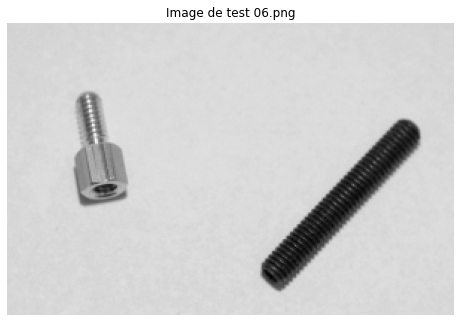

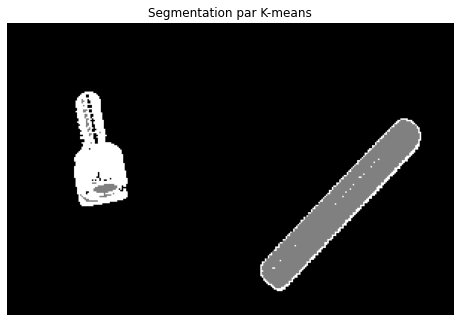

In [3]:
# Lire l'image de test pour K-means
image_path = "11.png"
image_kmeans = imread(image_path, as_gray=True)
image_reshaped = image_kmeans.reshape((-1, 1))

plt.figure(figsize=(8, 8))
plt.imshow(image_kmeans, cmap='gray')
plt.title("Image de test 06.png")
plt.axis('off')
plt.show()

# Appliquer K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(image_reshaped)
segmented_img = kmeans.labels_.reshape(image_kmeans.shape)

plt.figure(figsize=(8, 8))
plt.imshow(segmented_img, cmap='gray')
plt.title("Segmentation par K-means")
plt.axis('off')
plt.show()

I.3 **Segmentation par la méthode de croissance de région**

Pour segmenter une région R ayant un écart type de sigma_R.

— on commence par un point germe (seed) d’un niveau de gris donné (c’est la valeur initiale de la moyenne de R)

— puis on croit la région autour du germe, en ajoutant à la région tous les points avoisinants dont les niveaux de gris I(x; y) vérifient la condition:

|I(x; y) - mu_R|<= sigma_R, où mu_R est la moyenne de R.

— Recalculer la moyenne de R après croissance
— Réitérer les opérations 2 et 3, jusqu’à ce qu’il n’y ait plus de croissance.

Question:
1. Lire l’image mandrillgray.bmp et afficher la.
2. Choisir manuellement le point germe. Appliquer l'algorithme de croissance de région, pour segmenter une région d’écart type 0.1, autour de ce germe-là.
3. Afficher l’image segmentée sur l’image initiale

4. Essayez à présent de segmenter une région dont vous sélectionnerez le germe au moyen de la souris. Variez l’écart type. Commenter.
5. Modifier le code précédent pour segmenter 4 régions.

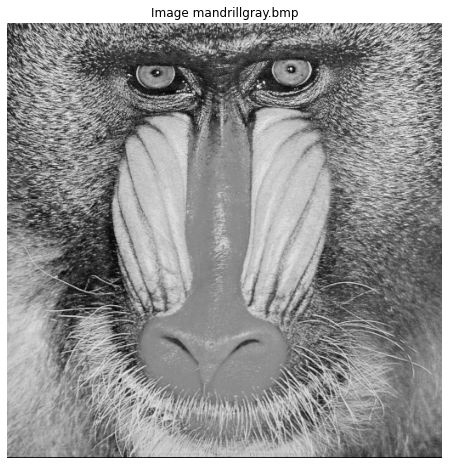

In [4]:
# Lire l'image mandrillgray.bmp
image_path = "mandrillgray.bmp"
image_mandrill = imread(image_path, as_gray=True)
plt.figure(figsize=(8, 8))
plt.imshow(image_mandrill, cmap='gray')
plt.title("Image mandrillgray.bmp")
plt.axis('off')
plt.show()

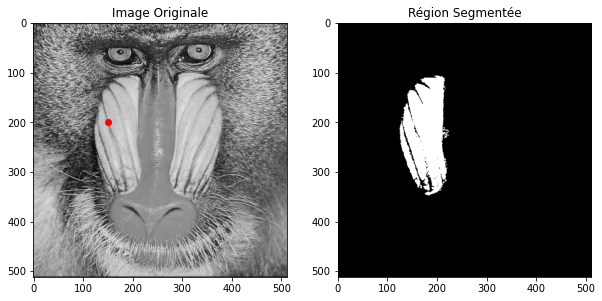

In [5]:
# Fonction de croissance de région
def region_growing(img, seed, threshold):
    dims = img.shape
    reg_mean = img[seed[1], seed[0]]
    region_size = 1
    neighbor_points_list = [seed]
    region_points = np.zeros_like(img, dtype=bool)
    region_points[seed[1], seed[0]] = True
    
    while len(neighbor_points_list) > 0:
        new_points_list = []
        for point in neighbor_points_list:
            neighbors = [(point[0] + i, point[1] + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (i != 0 or j != 0)]
            for n in neighbors:
                if (0 <= n[0] < dims[1]) and (0 <= n[1] < dims[0]) and not region_points[n[1], n[0]]:
                    if abs(int(img[n[1], n[0]]) - int(reg_mean)) <= threshold:
                        new_points_list.append(n)
                        region_points[n[1], n[0]] = True
                        reg_mean = (reg_mean * region_size + img[n[1], n[0]]) / (region_size + 1)
                        region_size += 1
        neighbor_points_list = new_points_list

    return region_points

# Point germe et seuil
seed_point = (150, 200)
threshold = 38 # Ecart type en niveau de gris, ajuster selon l'échelle 0-255

region = region_growing(image_mandrill, seed_point, threshold)


# Afficher les résultats
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image_mandrill, cmap='gray')
plt.title('Image Originale')
plt.scatter([seed_point[0]], [seed_point[1]], color='red')
plt.subplot(122)
plt.imshow(region, cmap='gray')
plt.title('Région Segmentée')
plt.show()



In [6]:
from io import BytesIO

def create_superposed_image(image, region):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image, cmap='gray')
    
    # Convertir la région en une image couleur
    region_color = np.zeros((*region.shape, 3), dtype=np.uint8)
    region_color[region] = [255, 0, 0]  # Colorer la région en rouge
    
    ax.imshow(region_color, alpha=0.5)  # Superposer l'image segmentée en couleur
    ax.axis('off')

    # Sauvegarder l'image dans un buffer
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    buf.seek(0)
    
    # Utiliser PIL pour lire l'image depuis le buffer
    pil_image = Image.open(buf)
    superposed_image = np.array(pil_image)
    
    buf.close()
    plt.close(fig)
    
    return superposed_image

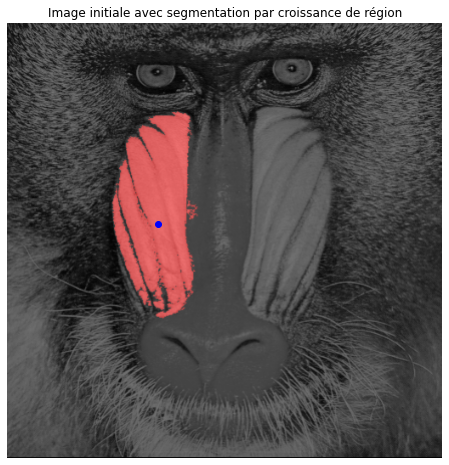

In [7]:
superposed_image = create_superposed_image(image_mandrill, region)
plt.figure(figsize=(8, 8))
plt.imshow(superposed_image)
plt.scatter([seed_point[0]], [seed_point[1]], color='blue')
plt.title("Image initiale avec segmentation par croissance de région")
plt.axis('off')
plt.show()

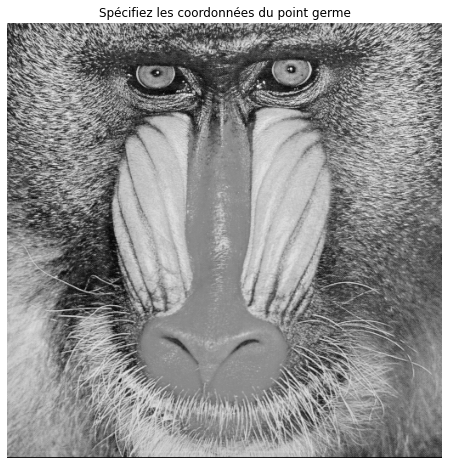

Entrez la coordonnée x du point germe: 185
Entrez la coordonnée y du point germe: 170
Point germe sélectionné : (170, 185)


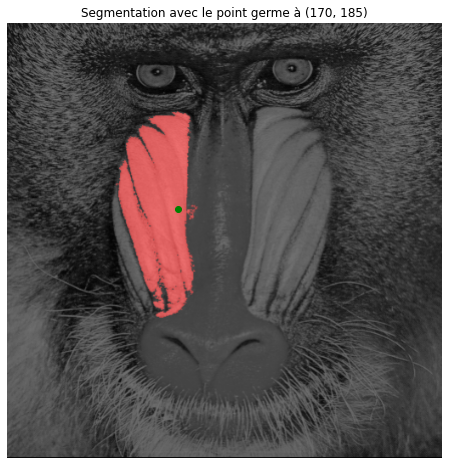

In [8]:
# Afficher l'image et demander à l'utilisateur de spécifier le point germe
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image_mandrill, cmap='gray')
ax.set_title("Spécifiez les coordonnées du point germe")
ax.axis('off')
plt.show()

# Demander à l'utilisateur de saisir les coordonnées du point germe
x_coord = int(input("Entrez la coordonnée x du point germe: "))
y_coord = int(input("Entrez la coordonnée y du point germe: "))
seed = (y_coord, x_coord)
print(f"Point germe sélectionné : {seed}")

# Appliquer la croissance de région avec les coordonnées spécifiées
region = region_growing(image_mandrill, seed, threshold)
superposed_image = create_superposed_image(image_mandrill, region)

# Afficher les résultats de la segmentation
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(superposed_image, cmap='gray')  # Superposer l'image segmentée
plt.scatter([seed[0]], [seed[1]], color='green')
ax.set_title(f"Segmentation avec le point germe à {seed}")
ax.axis('off')
plt.show()


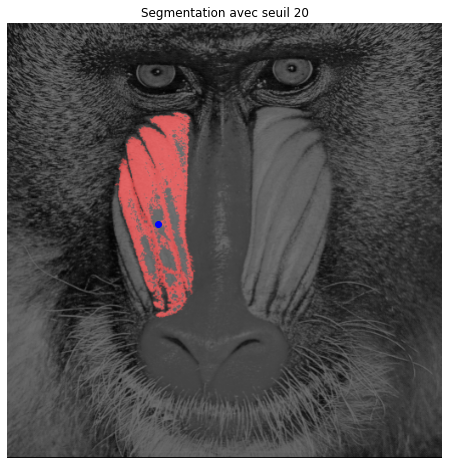

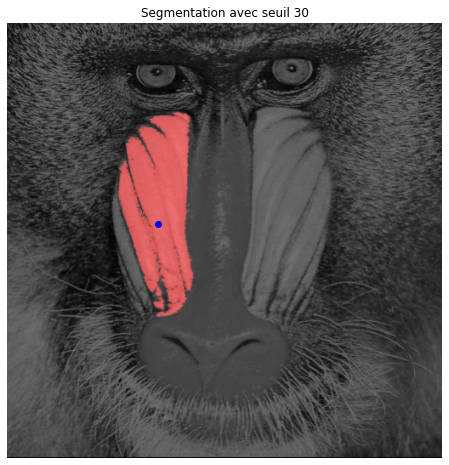

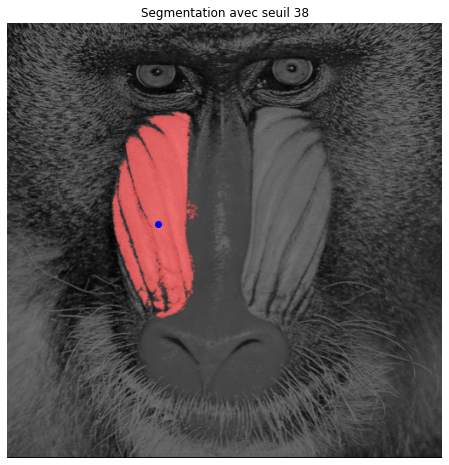

In [9]:
# Tester différents seuils
thresholds = [20, 30, 38]
seed = (150, 200)  # Utiliser un point germe fixe pour la comparaison
for threshold in thresholds:
    region = region_growing(image_mandrill, seed, threshold)
    
    superposed_image = create_superposed_image(image_mandrill, region)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(superposed_image, cmap='gray')
    plt.scatter([seed[0]], [seed[1]], color='blue')
    plt.title(f"Segmentation avec seuil {threshold}")
    plt.axis('off')
    plt.show()


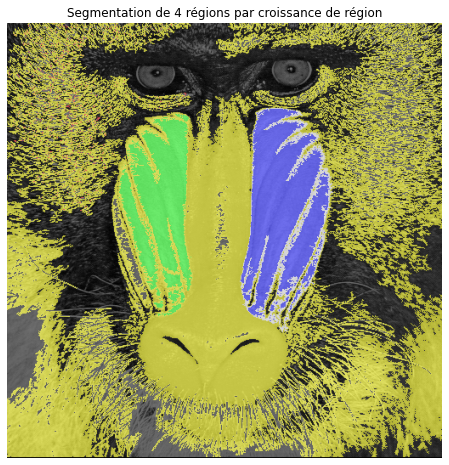

In [10]:
seeds = [(100, 100), (200, 200), (300, 300), (400, 400)]  # Exemples de points germes
threshold = 38  # Ecart type

# Initialisation de l'image segmentée en couleur
segmented_region_color = np.zeros((*image_mandrill.shape, 3), dtype=np.float64)

# Couleurs pour chaque région (utilisez des couleurs RGB distinctes)
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]

# Application de la croissance de région pour chaque point germe
for i, seed in enumerate(seeds):
    region = region_growing(image_mandrill, seed, threshold)
    for c in range(3):
        segmented_region_color[..., c] += region * colors[i][c]

# Conversion en uint8 après l'addition
segmented_region_color = np.clip(segmented_region_color, 0, 255).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(image_mandrill, cmap='gray')
plt.imshow(segmented_region_color, alpha=0.5)
plt.title("Segmentation de 4 régions par croissance de région")
plt.axis('off')
plt.show()

II- **Application des méthodes de segmentation sur les images du dossier Dataset**

II-1 Chargement et visualisation des images

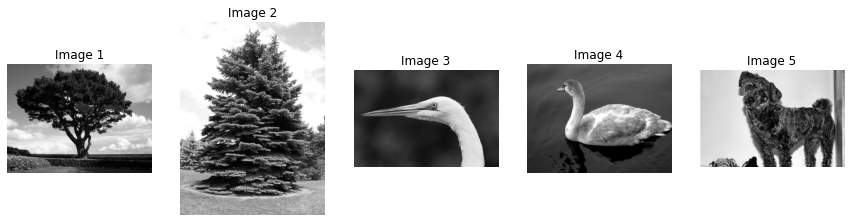


Dictionnaire des correspondances:
Image: Datasets/images\1objet\01.png -> Vérité terrain: Datasets/verite_terrain\1objet\01v.png
Image: Datasets/images\1objet\02.png -> Vérité terrain: Datasets/verite_terrain\1objet\02v.png
Image: Datasets/images\1objet\03.png -> Vérité terrain: Datasets/verite_terrain\1objet\03v.png
Image: Datasets/images\1objet\04.png -> Vérité terrain: Datasets/verite_terrain\1objet\04v.png
Image: Datasets/images\1objet\05.png -> Vérité terrain: Datasets/verite_terrain\1objet\05v.png
Image: Datasets/images\1objet\06.png -> Vérité terrain: Datasets/verite_terrain\1objet\06v.png
Image: Datasets/images\1objet\07.png -> Vérité terrain: Datasets/verite_terrain\1objet\07v.png
Image: Datasets/images\1objet\08.png -> Vérité terrain: Datasets/verite_terrain\1objet\08v.png
Image: Datasets/images\1objet\09.png -> Vérité terrain: Datasets/verite_terrain\1objet\09v.png
Image: Datasets/images\1objet\10.png -> Vérité terrain: Datasets/verite_terrain\1objet\10v.png
Image: Datasets

In [11]:
# Chemin du dataset d'images
dataset_img_path = "Datasets/images"
dataset_gt_path = "Datasets/verite_terrain"

# Parcourir le répertoire des images du dataset et stocker les chemins
dataset_images = []
for root, dirs, files in os.walk(dataset_img_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif')):
            image_path = os.path.join(root, file)
            dataset_images.append(image_path)

# Affichage de quelques images du dataset pour vérification
num_images_to_display = min(5, len(dataset_images))  # Afficher les 5 premières images ou moins
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    image = imread(dataset_images[i], as_gray=True)
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Image {i + 1}')
    plt.axis('off')
plt.show()

# Initialisation du dictionnaire
image_paths_dict = {}

# Fonction pour obtenir le nom du fichier sans l'extension
def get_filename_without_extension(file_path):
    return os.path.splitext(os.path.basename(file_path))[0]

# Création du dictionnaire à partir des deux listes en utilisant les noms des fichiers
for img_path in dataset_images:
    img_name = get_filename_without_extension(img_path)
    # Rechercher le fichier de vérité terrain correspondant
    gt_path = None
    for root, dirs, files in os.walk(dataset_gt_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif')):
                if img_name in file:  # Vérifier si le nom de l'image est contenu dans le nom du fichier de vérité terrain
                    gt_path = os.path.join(root, file)
                    break
        if gt_path:
            break
    if gt_path:
        image_paths_dict[img_path] = gt_path
    else:
        print(f"Vérité terrain non trouvée pour {img_path}")

# Affichage du dictionnaire pour vérification
print("\nDictionnaire des correspondances:")
for image_path, gt_path in image_paths_dict.items():
    print(f"Image: {image_path} -> Vérité terrain: {gt_path}")

II-2 Choix des méthodes de segmentation

In [12]:
def create_superposed_image_for_this_dataset(image, region):
    region_color = np.zeros_like(image, dtype=np.uint8)
    region_color[region] = 255  # Colorer la région en blanc
    
    return region_color

# Fonction pour évaluer les méthodes de segmentation
def evaluate_segmentation_methods(method, dataset_images, image_paths_dict):
    results = {'method': [], 'image': [], 'accuracy': [], 'f1_score': []}
    manual_threshold = 128 
    threshold = 35 

    for image_path in dataset_images:
        image = imread(image_path, as_gray=True)
        if method == 'manual_threshold':
            binary_image = image > manual_threshold
        elif method == 'otsu_threshold':
            otsu_threshold = threshold_otsu(image)
            binary_image = image > otsu_threshold
        elif method == 'kmeans':
            image_reshaped = image.reshape((-1, 1))
            kmeans = KMeans(n_clusters=3, random_state=42)
            kmeans.fit(image_reshaped)
            binary_image = kmeans.labels_.reshape(image.shape) == 1
        elif method == 'region_growing':
            seed = (image.shape[0] // 2, image.shape[1] // 2)
            region = region_growing(image, seed, threshold)
            binary_image = create_superposed_image_for_this_dataset(image, region)
        else:
            raise ValueError(f"Unknown method: {method}")
        
        # Convertir l'image binaire en niveaux de gris
        binary_image = binary_image.astype(np.uint8) * 255
        
        gt_path = image_paths_dict.get(image_path)
        gt_image = imread(gt_path, as_gray=True)
        gt_binary = gt_image > 0  # Assurez-vous que la vérité terrain est binaire
        
        # Redimensionner l'image binaire pour qu'elle corresponde à la taille de la vérité terrain
        if binary_image.shape != gt_binary.shape:
            binary_image = resize(binary_image, gt_binary.shape, preserve_range=True, anti_aliasing=True).astype(np.uint8)
            binary_image = binary_image > 127  # Convertir en binaire

        accuracy = calculate_accuracy(binary_image, gt_binary)
        f1_score = calculate_f1_score(binary_image, gt_binary)
        results['method'].append(method)
        results['image'].append(image_path)
        results['accuracy'].append(accuracy)
        results['f1_score'].append(f1_score)

    results_df = pd.DataFrame(results)
    return results_df

II-3.Choix des métriques d'évaluation

les métriques de performances se basent toutes sur les 4 notions suivantes : TP , FP , FN , TN

In [13]:
# Evaluation des performances (Accuracy, F1 Score)

def calculate_accuracy(pred, gt):
    tp = np.sum(np.logical_and(pred == 1, gt == 1))
    fp = np.sum(np.logical_and(pred == 1, gt == 0))
    fn = np.sum(np.logical_and(pred == 0, gt == 1))
    tn = np.sum(np.logical_and(pred == 0, gt == 0))
    total = tp + fp + fn + tn
    if total == 0:
        return 0
    accuracy = (tp + tn) / total
    return accuracy

def calculate_f1_score(pred, gt):
    tp = np.sum(np.logical_and(pred == 1, gt == 1))
    fp = np.sum(np.logical_and(pred == 1, gt == 0))
    fn = np.sum(np.logical_and(pred == 0, gt == 1))
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_score

## Application des méthodes et des métriques :

-

In [14]:
# Évaluation des méthodes de segmentation
methods = ['manual_threshold', 'otsu_threshold', 'kmeans', 'region_growing']
for method in methods:
    results_df = evaluate_segmentation_methods(method, dataset_images, image_paths_dict)
    print(f"Results for method: {method}")
    print(results_df.groupby('method').mean())
    print("--------------------------------------------------------------------------------\n")

Results for method: manual_threshold
                  accuracy  f1_score
method                              
manual_threshold  0.739202  0.055876
--------------------------------------------------------------------------------

Results for method: otsu_threshold
                accuracy  f1_score
method                            
otsu_threshold  0.847928  0.056817
--------------------------------------------------------------------------------

Results for method: kmeans
        accuracy  f1_score
method                    
kmeans  0.545266  0.049414
--------------------------------------------------------------------------------

Results for method: region_growing
                accuracy  f1_score
method                            
region_growing  0.431124  0.366674
--------------------------------------------------------------------------------



#### Conculsion :


Pour ce travail, nous avons appliqué différentes méthodes de segmentation sur un ensemble d'images issues de notre dataset, en utilisant des méthodes telles que le seuillage manuel, le seuillage d'Otsu, K-means et la croissance de région. Nous avons évalué les performances de ces méthodes en utilisant les métriques d'accuracy et de F1 score.

Les résultats montrent que :

    -Le seuillage manuel a montré une bonne performance en termes d'accuracy, mais un F1-score très bas indique une mauvaise précision ou rappel dans la segmentation.

    -Le seuillage d'Otsu a légèrement amélioré l'accuracy par rapport au seuillage manuel, mais le F1-score reste bas, reflétant des difficultés similaires dans la précision de la segmentation.

    -La méthode K-means a montré une performance inférieure en accuracy et F1-score, indiquant des difficultés à segmenter correctement les régions pertinentes.

    -La croissance de région a eu l'accuracy la plus basse, mais a significativement amélioré le F1-score, montrant une meilleure capacité à segmenter les régions avec une précision et un rappel plus équilibrés.

Les résultats montrent que le seuillage d'Otsu est la méthode la plus performante en termes d'accuracy, tandis que la croissance de région offre un meilleur F1-score, suggérant qu'elle capture mieux les véritables zones d'intérêt malgré une performance globale plus faible en accuracy. Le seuillage manuel et K-means ont montré des performances intermédiaires avec des compromis entre accuracy et F1-score (ce qui peut être dû à une mauvaise convergence ou à un choix de paramètres [comme le nombre de clusters] inadapté).

En conclusion, le choix de la méthode de segmentation doit dépendre du critère de performance prioritaire : pour une segmentation globale plus précise, le seuillage d'Otsu est recommandé, tandis que pour une meilleure détection des véritables zones d'intérêt, la croissance de région est plus adaptée.